In [17]:
%matplotlib inline

In [18]:
import pandas as pd
import Quandl as qdl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

- Open all listed stocks for  s&P CNX Nifty 50 

In [19]:
instrument_df = pd.read_csv("ind_niftylist.csv", encoding='utf-8')

In [20]:
instrument_df.head(5)

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,Ambuja Cements Ltd.,CEMENT & CEMENT PRODUCTS,AMBUJACEM,EQ,INE079A01024
2,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
3,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
4,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010


In [5]:
instrument_df['Symbol']

0            ACC
1      AMBUJACEM
2     ASIANPAINT
3       AXISBANK
4     BAJAJ-AUTO
5     BANKBARODA
6           BHEL
7           BPCL
8     BHARTIARTL
9       BOSCHLTD
10         CAIRN
11         CIPLA
12     COALINDIA
13       DRREDDY
14          GAIL
15        GRASIM
16       HCLTECH
17      HDFCBANK
18    HEROMOTOCO
19      HINDALCO
20    HINDUNILVR
21          HDFC
22           ITC
23     ICICIBANK
24          IDEA
25    INDUSINDBK
26          INFY
27     KOTAKBANK
28            LT
29         LUPIN
30           M&M
31        MARUTI
32          NMDC
33          NTPC
34          ONGC
35     POWERGRID
36           PNB
37      RELIANCE
38          SBIN
39     SUNPHARMA
40           TCS
41    TATAMOTORS
42     TATAPOWER
43     TATASTEEL
44         TECHM
45    ULTRACEMCO
46          VEDL
47         WIPRO
48       YESBANK
49          ZEEL
Name: Symbol, dtype: object

### Fetch historical data for S&P CNX Nifty 50 since 2010

In [21]:
cnx_nifty_data = qdl.get("NSE/CNX_NIFTY", trim_start="2012-03-01")

In [22]:
cnx_nifty_data[:5]

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2012-03-01,5366.00,5372.45,5297.50,5339.75,196867905,6847.63
2012-03-02,5369.45,5392.55,5315.05,5359.35,185021526,6768.52
2012-03-03,5360.05,5369.60,5353.40,5359.40,16770991,429.35
2012-03-05,5342.55,5344.50,5265.70,5280.35,196421155,6036.63
2012-03-06,5266.00,5382.05,5206.40,5222.40,290396014,9319.01


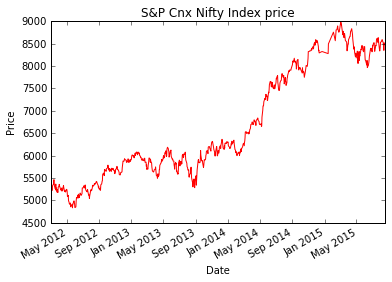

In [23]:
close_price = cnx_nifty_data['Close']
plt.figure()
close_price.plot(color='r', title='S&P Cnx Nifty Index price')
plt.xlabel('Date')
plt.ylabel('Price')

-  Simple moving average (SMA) is calculated by computing the average price of a security over a specified number of periods. 

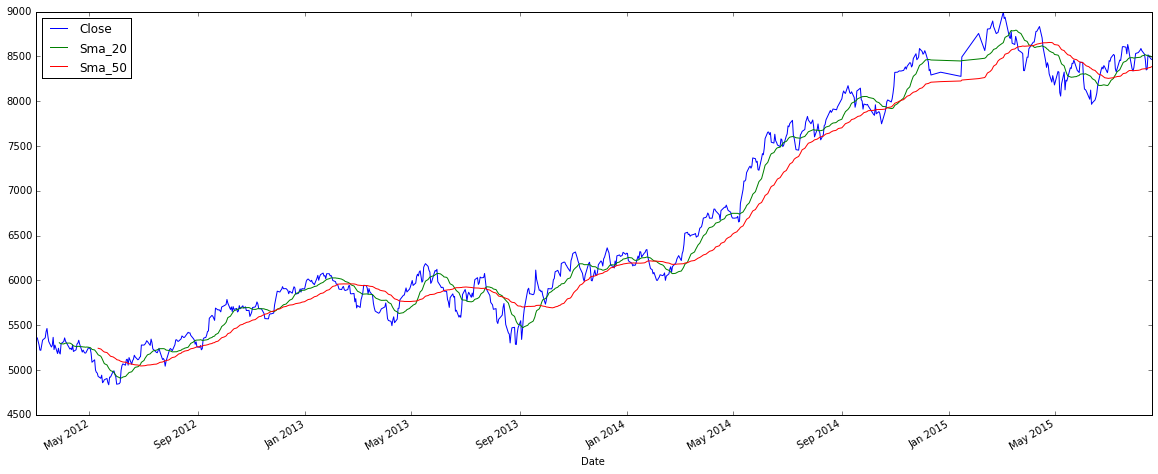

In [24]:
# Calculate the SMA
sma_20 = pd.rolling_mean(close_price, window=20)
sma_50 = pd.rolling_mean(close_price, window=50)
temp_data = pd.DataFrame(close_price)
temp_data['Sma_20'] = sma_20
temp_data['Sma_50'] = sma_50
f = plt.figure(figsize=(20,8))
temp_data.plot(ax=f.gca(),y=['Close','Sma_20','Sma_50'])
plt.show()

- Exponential moving average (EMA) is calculated by taking a weighted average of past prices. As prices get farther into the past, they are weighted less and less. This means more recent values of the security effect the EMA result more than past values. 

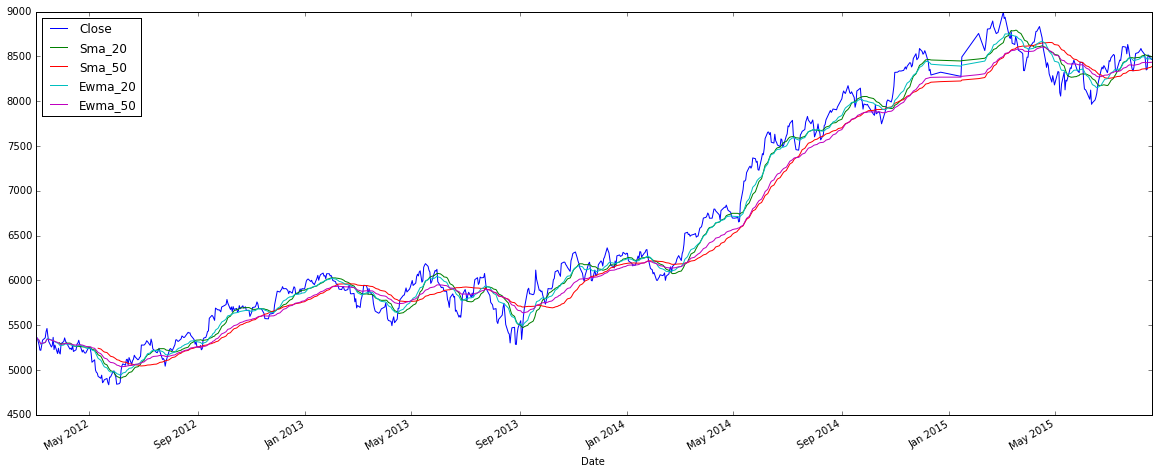

In [25]:
ewma_20 = pd.ewma(close_price, span=20)
ewma_50 = pd.ewma(close_price, span=50)
temp_data['Ewma_20'] = ewma_20
temp_data['Ewma_50'] = ewma_50
f = plt.figure(figsize=(20,8))
temp_data.plot(ax=f.gca(),y=['Close','Sma_20','Sma_50','Ewma_20','Ewma_50'])
plt.show()